# 14. Web Integration

Chapter 14 of Python for Finance (continued)

Hilpisch, Yves. Python for Finance: Analyze Big Financial Data. O'Reilly Media. Kindle Edition.

In [1]:
import ftplib
import numpy as np

In [2]:
# ftp = ftplib.FTP('oreilly.quant-platform.com')
# ftp.login(user='tttrinter', passwd='t0mmyt')

# ftp = ftplib.FTP('oreilly.quant-platform.com')
# ftp.login(user='tttrinter', passwd='t0mmyt')

#These are not working

In [3]:
import httplib2

In [58]:
http = httplib2.HTTPConnectionWithTimeout('hilpisch.com')

In [59]:
http.request('GET', '/index.htm')

In [60]:
resp = http.getresponse()

In [61]:
resp

In [62]:
resp.status, resp.reason

(200, 'OK')

In [63]:
content = str(resp.read())
content[:100]

'b\'<!doctype html>\\n<html lang="en">\\n\\n\\t<head>\\n\\t\\t<meta charset="utf-8">\\n\\n\\t\\t<title>Dr. Yves J'

In [64]:
index = content.find(" E ")
index

2268

In [65]:
content[index:index+29]

' E contact [at] dyjh [dot] de'

In [66]:
http.close()

In [75]:
import urllib.request

In [90]:
# http://chart.finance.yahoo.com/table.csv?s=YHOO&a=10&b=25&c=2016&d=11&e=25&f=2016&g=d&ignore=.csv
url = 'http://chart.finance.yahoo.com/table.csv?g=d&ignore=.csv' 
url += '&s=YHOO&a=01&b=1&c=2014&d=02&e=6&f=2014'
url

'http://chart.finance.yahoo.com/table.csv?g=d&ignore=.csv&s=YHOO&a=01&b=1&c=2014&d=02&e=6&f=2014'

In [91]:
connect = urllib.request.urlopen(url)

In [92]:
data = connect.read()

In [93]:
print(data)

b'Date,Open,High,Low,Close,Volume,Adj Close\n2014-03-06,39.599998,39.98,39.50,39.66,10626700,39.66\n2014-03-05,39.830002,40.150002,39.189999,39.50,12536800,39.50\n2014-03-04,38.759998,39.790001,38.68,39.630001,16139400,39.630001\n2014-03-03,37.650002,38.66,37.43,38.25,14714700,38.25\n2014-02-28,38.549999,39.380001,38.220001,38.669998,16957100,38.669998\n2014-02-27,37.799999,38.48,37.740002,38.470001,15489400,38.470001\n2014-02-26,37.349998,38.099998,37.34,37.619999,15778900,37.619999\n2014-02-25,37.48,37.580002,37.02,37.259998,9756900,37.259998\n2014-02-24,37.23,37.709999,36.82,37.419998,15738900,37.419998\n2014-02-21,37.900002,37.959999,37.220001,37.290001,12351900,37.290001\n2014-02-20,37.830002,38.040001,37.299999,37.790001,11155900,37.790001\n2014-02-19,38.060001,38.330002,37.68,37.810001,15851900,37.810001\n2014-02-18,38.310001,38.59,38.09,38.310001,12096400,38.310001\n2014-02-14,38.43,38.450001,38.110001,38.23,9975800,38.23\n2014-02-13,37.919998,38.689999,37.790001,38.52,12088100

## Static Plots

In [95]:
import numpy as np
import pandas as pd
%matplotlib inline

In [96]:
url = 'http://chart.finance.yahoo.com/table.csv?g=d&ignore=.csv' 
url += '&s=MSFT&a=0&b=1&c=2009'
data = pd.read_csv(url, parse_dates=['Date'])

In [98]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-12-23,63.450001,63.540001,62.799999,63.240002,12398000,63.240002
1,2016-12-22,63.840000,64.099998,63.410000,63.549999,22155200,63.549999
2,2016-12-21,63.430000,63.700001,63.119999,63.540001,17071800,63.540001
3,2016-12-20,63.689999,63.799999,63.029999,63.540001,25389900,63.540001
4,2016-12-19,62.560001,63.770000,62.419998,63.619999,33182800,63.619999


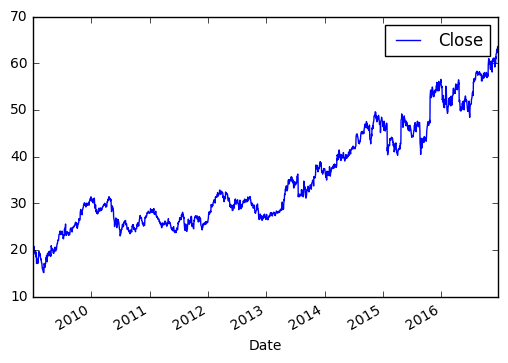

In [99]:
data.plot(x='Date',y='Close')

## Bokeh Plotting

In [100]:
import bokeh.plotting as bp

In [113]:
# bp.output_file("msft_1.html",title="Bokeh Example (static)")
#use: bp.output_notebook("default")
#for output  within a Jupyter notebook
bp.output_notebook()

Loading BokehJS ...

In [115]:
p = bp.figure(title='Historical Stock Quotes', 
              x_axis_type='datetime',
             x_axis_label='Date',
             y_axis_label='Price')

p.line(data['Date'], data['Close'], legend='MSFT')
bp.show(p)

## Real Time FX Data

In [117]:
import time
import pandas as pd
import datetime as dt
import requests

In [118]:
url = 'http://api-sandbox.oanda.com/v1/prices?instruments={}'

In [123]:
instrument='EUR_USD'
api = requests.get(url.format(instrument))

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): api-sandbox.oanda.com


ConnectionError: HTTPConnectionPool(host='api-sandbox.oanda.com', port=80): Max retries exceeded with url: /v1/prices?instruments=EUR_USD (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000018A4A412DA0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [ ]:
data = api.json()
data